<a href="https://colab.research.google.com/github/earo12/Anomaly-Credit-Card-Transactions-Detector/blob/main/ANOMALY_CREDIT_CARD_DETECTOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

import math
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Reading the csv file

In [4]:
df = pd.read_csv('/content/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [5]:
df.shape

(105067, 31)

In [6]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
105062,69348,1.255690,-1.393540,0.692738,-1.289430,-1.682706,-0.276840,-1.136732,-0.076399,-1.738348,...,0.039513,0.368717,-0.072065,0.106986,0.257991,-0.087901,0.054217,0.043817,116.00,0.0
105063,69349,-1.250199,0.123183,1.051709,-0.236427,1.611834,0.284241,0.288190,0.303990,-0.430526,...,0.034681,-0.039897,-0.049460,-1.399614,0.217418,-0.496523,-0.042176,0.161224,3.99,0.0
105064,69349,-1.925153,-0.140133,2.456659,0.148112,-0.284164,-0.150520,-1.129736,1.003991,-0.218409,...,0.447094,0.895815,-0.233737,0.262490,0.050375,0.515140,0.207773,-0.090777,4.69,0.0
105065,69349,1.277856,-0.027651,0.249167,0.697814,-0.232188,-0.118324,-0.145313,-0.048568,0.677505,...,-0.141950,-0.164073,-0.194695,-0.381716,0.696330,0.489582,-0.017759,0.002991,10.00,0.0
105066,69350,-1.176438,0.811442,0.539281,-1.505794,0.401363,0.202677,0.284898,0.547988,-0.438512,...,0.077511,0.008094,-0.020608,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,105067.000000,105067.000000,105067.000000,105067.000000,105067.000000,105067.000000,105067.000000,105067.000000,105067.000000,105067.000000,...,105067.000000,105067.000000,105067.000000,105066.000000,105066.000000,105066.000000,105066.000000,105066.000000,105066.000000,105066.000000
mean,43680.301455,-0.258318,-0.029705,0.683599,0.156974,-0.283527,0.098924,-0.116800,0.057275,-0.050479,...,-0.029851,-0.105483,-0.037181,0.009834,0.133576,0.026062,0.001671,0.001795,96.626111,0.002208
std,17527.890732,1.851801,1.650087,1.319498,1.345212,1.351589,1.301365,1.214204,1.236547,1.112787,...,0.744325,0.639981,0.626223,0.595669,0.440315,0.491947,0.392645,0.321359,262.315215,0.046939
min,0.000000,-56.407510,-72.715728,-33.680984,-5.172595,-42.147898,-26.160506,-31.764946,-73.216718,-9.283925,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.534330,-9.390980,-9.617915,0.000000,0.000000
25%,33975.500000,-1.024715,-0.598212,0.178273,-0.714182,-0.907139,-0.644227,-0.606695,-0.135125,-0.696261,...,-0.223703,-0.531229,-0.177131,-0.323208,-0.130802,-0.323481,-0.061425,-0.005146,7.160000,0.000000
50%,45510.000000,-0.260627,0.075873,0.759148,0.184867,-0.318318,-0.153233,-0.072970,0.077001,-0.118121,...,-0.056348,-0.081414,-0.049651,0.065708,0.172075,-0.069141,0.010581,0.023346,25.500000,0.000000
75%,57712.000000,1.154766,0.735425,1.385199,1.026157,0.245212,0.494042,0.409551,0.368539,0.549453,...,0.121112,0.315794,0.080780,0.407051,0.421563,0.295664,0.084462,0.076727,87.540000,0.000000
max,69350.000000,1.960497,18.902453,4.226108,16.715537,34.801666,22.529298,36.677268,20.007208,10.392889,...,27.202839,10.503090,19.002942,4.016342,5.541598,3.517346,12.152401,33.847808,19656.530000,1.000000


array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

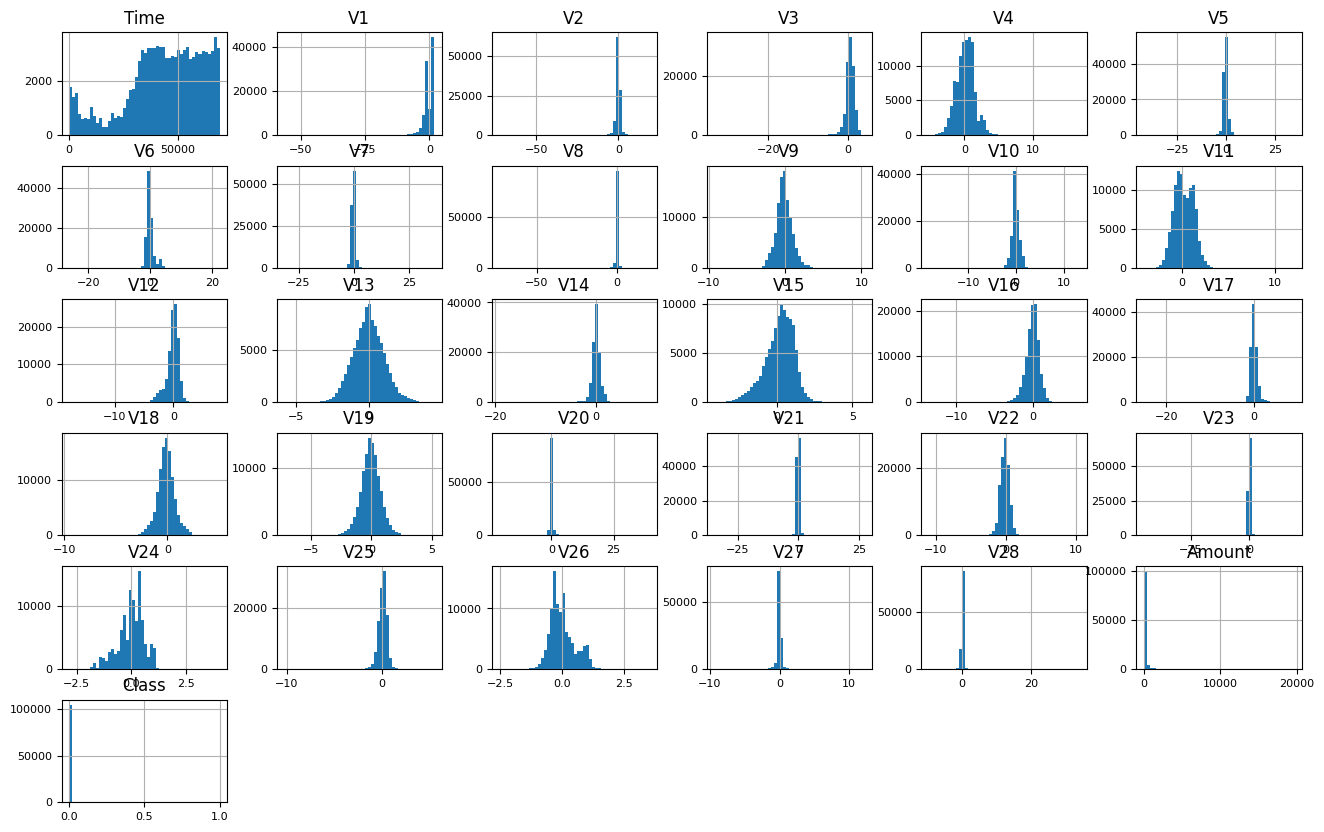

In [8]:
df.hist(figsize=(16, 10), bins=50, xlabelsize=8, ylabelsize=8)

Let us check some values, in particular TP, TN, FP and FN

In [9]:
data = df
data_0, data_1 = data[data['Class'] == 0], data[data['Class'] == 1]

In [10]:
X_0, y_0 = data_0.drop('Class', axis = 1), data_0['Class']
X_1, y_1 = data_1.drop('Class', axis = 1), data_1['Class']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_0, y_0, test_size = 0.2, random_state = 40)

In [14]:
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 40)

In [15]:
data_val_1, data_test_1 = pd.concat([X_val, y_val], axis = 1), pd.concat([X_test, y_test], axis = 1)

In [16]:
# Dividing the fraudulent class
X_val, X_test, y_val, y_test = train_test_split(X_1, y_1, test_size = 0.5, random_state = 40)

In [17]:
data_val_2, data_test_2 = pd.concat([X_val, y_val], axis = 1), pd.concat([X_test, y_test], axis = 1)

In [18]:
# construction of the validation set:_
data_val, data_test = pd.concat([data_val_1, data_val_2], axis = 0), pd.concat([data_test_1, data_test_2], axis = 0)

In [19]:
X_val, y_val = data_val.drop('Class', axis = 1), data_val['Class']
X_test, y_test = data_test.drop('Class', axis = 1), data_test['Class']

In [20]:
#let's check the autentinct fraudulent transactions if we use training and validation test datasets:
labels = ['Train', 'Validation', 'Test']
values_0 = [len(y_train[y_train == 0]), len(y_val[y_val == 0]), len(y_test[y_test == 0])]
values_1 = [len(y_train[y_train == 1]), len(y_val[y_val == 1]), len(y_test[y_test == 1])]
fig = make_subplots(rows = 1, cols = 2, specs = [[{'type': 'domain'}, {'type': 'domain'}]])
fig.add_trace(go.Pie(values = values_0, labels = labels, hole = 0.5, textinfo = 'percent', title = "Authentic"),
              row = 1, col = 1)
fig.add_trace(go.Pie(values = values_1, labels = labels, hole = 0.5, textinfo = 'percent', title = "Fraudulent"),
              row = 1, col = 2)
text_title = "Distribution of authentic and fraudulent transactions over training, validation and test set"
fig.update_layout(height = 500, width = 800, showlegend = True, title = dict(text = text_title, x = 0.5, y = 0.95))
fig.show()

<ipython-input-21-bdc4f7e9f3ec>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-21-bdc4f7e9f3ec>:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




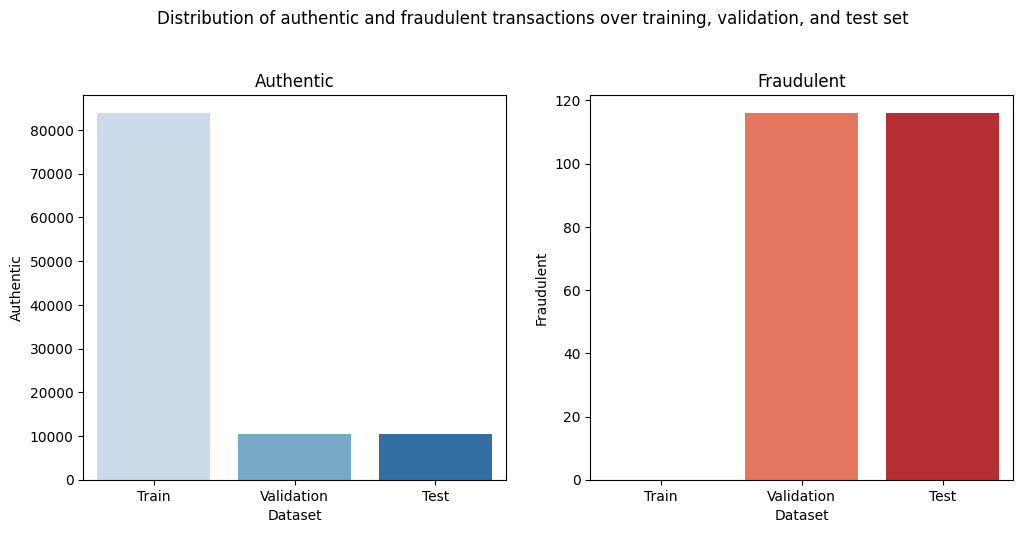

In [21]:
#Since GitHub doesn't allow to put Plotly graphs we can put in Seaborn:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data preparation
data = {'Dataset': ['Train', 'Validation', 'Test'],
        'Authentic': [len(y_train[y_train == 0]), len(y_val[y_val == 0]), len(y_test[y_test == 0])],
        'Fraudulent': [len(y_train[y_train == 1]), len(y_val[y_val == 1]), len(y_test[y_test == 1])]}

testing = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(x='Dataset', y='Authentic', data=testing, palette='Blues')
plt.title('Authentic')

plt.subplot(1, 2, 2)
sns.barplot(x='Dataset', y='Fraudulent', data=testing, palette='Reds')
plt.title('Fraudulent')

plt.suptitle('Distribution of authentic and fraudulent transactions over training, validation, and test set', y=1.05)
plt.show()
